## Importamos las librerias ## 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

In [7]:
fees_original = pd.read_csv("./project_dataset/fees_data.csv")
fees = fees_original.copy()
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [8]:
cash_original = pd.read_csv("./project_dataset/cash_request.csv")
cash = cash_original.copy()
cash.info()
cash.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [9]:
cash.describe()

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


In [10]:
cash['created_at'] = pd.to_datetime(cash['created_at'],utc = True)
cash['user_id_new'] = cash['user_id'].fillna(cash['deleted_account_id'])
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [11]:
cash['created_at_by_YM'] = cash['created_at'].dt.to_period('M')
grouping1 = cash.groupby('user_id_new')['created_at_by_YM']
cash['cohorte_month'] = cash.groupby('user_id_new')['created_at_by_YM'].transform('min')
cash.head()
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

/tmp/ipykernel_20613/363362537.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['created_at_by_YM'] = cash['created_at'].dt.to_period('M')


In [12]:
print('Estos son los nulos del df Cash:\n',cash.isnull().sum())

Estos son los nulos del df Cash:
 id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
user_id_new                       0
created_at_by_YM                  0
cohorte_month                     0
dtype: int64


In [13]:
cash.groupby("status").agg('count')

,id,amount,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,user_id_new,created_at_by_YM,cohorte_month
status,,,,,,,,,,,,,,,,,,
active,59,59,59,59,59,26,0,59,56,15,59,44,33,33,33,59,59,59
canceled,33,33,33,33,7,3,26,33,1,1,33,18,0,0,0,33,33,33
direct_debit_rejected,831,831,831,831,815,459,16,831,789,314,831,626,820,820,820,831,831,831
direct_debit_sent,34,34,34,34,34,15,0,34,34,4,34,31,16,16,16,34,34,34
money_back,16397,16397,16397,16397,15683,8965,715,16397,15408,16207,16397,12012,2460,2460,2460,16397,16397,16397
rejected,6568,6568,6568,6568,5221,6566,1347,6568,1,0,6568,3862,0,0,0,6568,6568,6568
transaction_declined,48,48,48,48,48,1,0,48,0,2,48,48,1,1,1,48,48,48


In [14]:
cash.groupby(cash['cohorte_month'])['amount'].count()

cohorte_month
2019-11       8
2019-12    1080
2020-01     354
2020-02     441
2020-03     371
2020-04     952
2020-05    1660
2020-06    5266
2020-07    4147
2020-08    1632
2020-09    2925
2020-10    5058
2020-11      76
Freq: M, Name: amount, dtype: int64

In [15]:
# Cash Request separado por lineas a utilizar = crsplu

crsplu = cash[['id','user_id_new','status','cohorte_month','amount']]
crsplu = crsplu[crsplu['status'].isin(['money_back'])]
print(crsplu.info())
print(crsplu.head())

<class 'pandas.core.frame.DataFrame'>
Index: 16397 entries, 5 to 23968
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   id             16397 non-null  int64    
 1   user_id_new    16397 non-null  float64  
 2   status         16397 non-null  object   
 3   cohorte_month  16397 non-null  period[M]
 4   amount         16397 non-null  float64  
dtypes: float64(2), int64(1), object(1), period[M](1)
memory usage: 768.6+ KB
None
       id  user_id_new      status cohorte_month  amount
5    2145       9489.0  money_back       2020-05   100.0
11   1794        778.0  money_back       2019-12   100.0
13   2122       8218.0  money_back       2020-04   100.0
43   1629       9068.0  money_back       2020-05   100.0
48  23534      21465.0  money_back       2020-09    25.0


In [16]:
crsplu[crsplu['cohorte_month'].isna()]

,id,user_id_new,status,cohorte_month,amount


In [17]:
fees[fees['paid_at'].isna()].head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
9,15431,22106.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 22106,2020-10-21 08:48:50.696961+00,2020-10-21 08:48:50.696991+00,NaN,2020-11-04 22:00:00+00,2020-11-05 11:00:00+00,before
12,20199,25490.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 25490,2020-10-30 16:51:49.45659+00,2020-10-30 16:51:49.456616+00,NaN,2020-11-06 22:00:00+00,2020-11-12 11:00:00+00,before
19,19761,24564.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 24564,2020-10-29 14:00:30.956061+00,2020-10-29 14:00:30.956085+00,NaN,2020-10-29 23:00:00+00,2020-10-30 23:00:00+00,before
21,20530,19909.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 19909,2020-10-31 01:49:46.485098+00,2020-10-31 01:49:46.485121+00,NaN,2020-11-03 23:51:00+00,2020-11-05 23:00:00+00,before
29,16690,22251.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 22251,2020-10-23 19:27:18.036963+00,2020-10-23 19:27:18.036987+00,NaN,2020-10-29 11:00:00+00,2020-11-05 11:00:00+00,before


In [18]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [19]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [20]:
for x in fees:
  print(fees[x].value_counts())

id
6537     1
7852     1
7846     1
7844     1
6968     1
        ..
19214    1
6206     1
20101    1
17541    1
13301    1
Name: count, Length: 21061, dtype: int64
cash_request_id
12225.0    35
5006.0     28
4410.0     24
12452.0    23
11376.0    21
           ..
24822.0     1
26203.0     1
22956.0     1
23207.0     1
25331.0     1
Name: count, Length: 12933, dtype: int64
type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64
status
accepted     14841
cancelled     4938
rejected      1194
confirmed       88
Name: count, dtype: int64
category
rejected_direct_debit     1599
month_delay_on_payment     597
Name: count, dtype: int64
total_amount
5.0     21060
10.0        1
Name: count, dtype: int64
reason
rejected direct debit                 1599
month delay on payment - 9/2020        283
month delay on payment - 8/2020        203
month delay on payment - 10/2020       102
Postpone Cash Request 12225             34
                       

In [21]:
fees_modidy = fees[['id','cash_request_id','type','status','total_amount','created_at','charge_moment']]
fees_accepted = fees_modidy[fees_modidy['status']== 'accepted']
fees_accepted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14841 entries, 1 to 21060
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14841 non-null  int64  
 1   cash_request_id  14841 non-null  float64
 2   type             14841 non-null  object 
 3   status           14841 non-null  object 
 4   total_amount     14841 non-null  float64
 5   created_at       14841 non-null  object 
 6   charge_moment    14841 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 927.6+ KB


In [22]:
fees_accepted[fees_accepted['created_at'].isna()]

,id,cash_request_id,type,status,total_amount,created_at,charge_moment


In [23]:
fees_accepted['created_at'] = pd.to_datetime(fees_accepted['created_at'],utc = True)
fees_accepted['created_at_fees_by_YM'] = fees_accepted['created_at'].dt.to_period('M')
grouping1 = fees_accepted.groupby('cash_request_id')['created_at_fees_by_YM']
fees_accepted['cohorte_month_fees'] = fees_accepted.groupby('cash_request_id')['created_at_fees_by_YM'].transform('min')
print(fees_accepted.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14841 entries, 1 to 21060
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     14841 non-null  int64              
 1   cash_request_id        14841 non-null  float64            
 2   type                   14841 non-null  object             
 3   status                 14841 non-null  object             
 4   total_amount           14841 non-null  float64            
 5   created_at             14841 non-null  datetime64[ns, UTC]
 6   charge_moment          14841 non-null  object             
 7   created_at_fees_by_YM  14841 non-null  period[M]          
 8   cohorte_month_fees     14841 non-null  period[M]          
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(3), period[M](2)
memory usage: 1.1+ MB
None


/tmp/ipykernel_20613/3444723982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fees_accepted['created_at'] = pd.to_datetime(fees_accepted['created_at'],utc = True)
/tmp/ipykernel_20613/3444723982.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fees_accepted['created_at_fees_by_YM'] = fees_accepted['created_at'].dt.to_period('M')
/tmp/ipykernel_20613/3444723982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fees_accepted['created_at_fees_by_YM'] =

In [24]:
print(crsplu.info())
print(fees_accepted.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16397 entries, 5 to 23968
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   id             16397 non-null  int64    
 1   user_id_new    16397 non-null  float64  
 2   status         16397 non-null  object   
 3   cohorte_month  16397 non-null  period[M]
 4   amount         16397 non-null  float64  
dtypes: float64(2), int64(1), object(1), period[M](1)
memory usage: 768.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 14841 entries, 1 to 21060
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     14841 non-null  int64              
 1   cash_request_id        14841 non-null  float64            
 2   type                   14841 non-null  object             
 3   status                 14841 non-null  object             
 4   

In [25]:
merge_fees_cash =  crsplu.merge(fees_accepted, right_on='cash_request_id', left_on='id',how='right')
merge_fees_cash

,id_x,user_id_new,status_x,cohorte_month,amount,id_y,cash_request_id,type,status_y,total_amount,created_at,charge_moment,created_at_fees_by_YM,cohorte_month_fees
0,11714.0,16158.0,money_back,2020-06,100.0,6961,11714.0,incident,accepted,5.0,2020-09-09 20:51:17.998653+00:00,after,2020-09,2020-08
1,23371.0,81575.0,money_back,2020-10,100.0,16296,23371.0,instant_payment,accepted,5.0,2020-10-23 10:10:58.352972+00:00,after,2020-10,2020-10
2,26772.0,94393.0,money_back,2020-10,100.0,20775,26772.0,instant_payment,accepted,5.0,2020-10-31 15:46:53.643958+00:00,after,2020-10,2020-10
3,19350.0,19005.0,money_back,2020-06,50.0,11242,19350.0,instant_payment,accepted,5.0,2020-10-06 08:20:17.170432+00:00,after,2020-10,2020-10
4,24052.0,90386.0,money_back,2020-10,100.0,17029,24052.0,instant_payment,accepted,5.0,2020-10-24 12:22:27.666102+00:00,after,2020-10,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14836,20616.0,13681.0,money_back,2020-06,100.0,12867,20616.0,instant_payment,accepted,5.0,2020-10-12 13:54:28.690344+00:00,after,2020-10,2020-10
14837,17921.0,48391.0,money_back,2020-09,50.0,15712,17921.0,incident,accepted,5.0,2020-10-21 22:22:56.192830+00:00,after,2020-10,2020-09
14838,15088.0,17553.0,money_back,2020-06,100.0,14209,15088.0,incident,accepted,5.0,2020-10-16 23:49:42.047800+00:00,after,2020-10,2020-09
14839,12520.0,23912.0,money_back,2020-07,100.0,18244,12520.0,incident,accepted,5.0,2020-10-27 00:16:30.736241+00:00,after,2020-10,2020-08


In [26]:

#merge_fees_cash = merge_fees_cash[~merge_fees_cash['id_x'].isna()]
merge_fees_cash.dropna(subset=['id_x'], inplace=True)
merge_fees_cash.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14469 entries, 0 to 14839
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id_x                   14469 non-null  float64            
 1   user_id_new            14469 non-null  float64            
 2   status_x               14469 non-null  object             
 3   cohorte_month          14469 non-null  period[M]          
 4   amount                 14469 non-null  float64            
 5   id_y                   14469 non-null  int64              
 6   cash_request_id        14469 non-null  float64            
 7   type                   14469 non-null  object             
 8   status_y               14469 non-null  object             
 9   total_amount           14469 non-null  float64            
 10  created_at             14469 non-null  datetime64[ns, UTC]
 11  charge_moment          14469 non-null  object             


In [27]:
for x in merge_fees_cash:
  print(merge_fees_cash[x].value_counts())

id_x
3759.0     13
12452.0     5
1655.0      5
8948.0      5
5006.0      5
           ..
21484.0     1
24603.0     1
26030.0     1
23193.0     1
20616.0     1
Name: count, Length: 11588, dtype: int64
user_id_new
17144.0    15
12934.0    11
18984.0     8
13404.0     7
5189.0      7
           ..
37283.0     1
78193.0     1
83737.0     1
77972.0     1
85044.0     1
Name: count, Length: 8343, dtype: int64
status_x
money_back    14469
Name: count, dtype: int64
cohorte_month
2020-10    4643
2020-06    2774
2020-09    2237
2020-07    2139
2020-08     985
2020-05     756
2020-04     305
2019-12     220
2020-02     127
2020-03     122
2020-01      91
2020-11      64
2019-11       6
Freq: M, Name: count, dtype: int64
amount
100.0    9414
50.0     3297
25.0     1091
80.0      117
60.0      110
20.0       91
70.0       87
30.0       68
40.0       52
90.0       38
10.0       36
95.0        9
35.0        7
15.0        7
45.0        7
55.0        7
65.0        5
5.0         5
75.0        4
200.0    

In [28]:
# Calcular los ingresos generados por cada cohorte
cohort_ingresos = merge_fees_cash.groupby('cohorte_month')['total_amount'].sum().reset_index()
cohort_ingresos.columns = ['cohorte_month', 'Ingresos por cohorte']

print('Estos son los ingresos generados por mes\n',cohort_ingresos)
print('\nTotal de ingresos es de ',merge_fees_cash['total_amount'].sum())

Estos son los ingresos generados por mes
    cohorte_month  Ingresos por cohorte
0        2019-11                  30.0
1        2019-12                1100.0
2        2020-01                 455.0
3        2020-02                 635.0
4        2020-03                 610.0
5        2020-04                1525.0
6        2020-05                3780.0
7        2020-06               13870.0
8        2020-07               10695.0
9        2020-08                4925.0
10       2020-09               11185.0
11       2020-10               23220.0
12       2020-11                 320.0

Total de ingresos es de  72350.0


## Gráficos ##

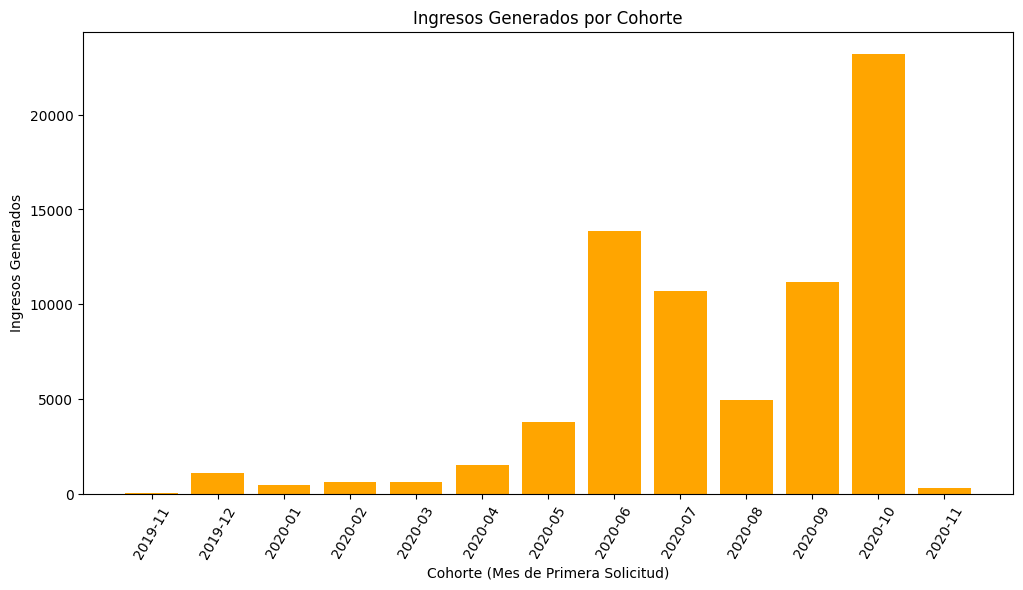

In [29]:
# Graficar los ingresos por cohorte
plt.figure(figsize=(12, 6))
plt.bar(cohort_ingresos['cohorte_month'].astype(str), cohort_ingresos['Ingresos por cohorte'], color='orange')
plt.xlabel('Cohorte (Mes de Primera Solicitud)')
plt.ylabel('Ingresos Generados')
plt.title('Ingresos Generados por Cohorte')
plt.xticks(rotation=60)
plt.show()

In [30]:
#merge_fees_cash['month'] = merge_fees_cash['created_at'].dt.to_period('M')

# Agrupar por cohorte y mes para sumar los ingresos
ingreso_mensual_por_cohorte= merge_fees_cash.groupby(['cohorte_month', 'created_at_fees_by_YM'])['total_amount'].sum().reset_index()

# Pivotear los datos para el mapa de calor
pivot_income = ingreso_mensual_por_cohorte.pivot(index='cohorte_month', columns='created_at_fees_by_YM', values='total_amount')
pivot_income

created_at_fees_by_YM,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohorte_month,,,,,,,
2019-11,NaN,NaN,5.0,5.0,10.0,10.0,NaN
2019-12,NaN,60.0,125.0,280.0,285.0,350.0,NaN
2020-01,NaN,25.0,65.0,115.0,100.0,150.0,NaN
2020-02,NaN,55.0,45.0,175.0,145.0,210.0,5.0
2020-03,NaN,50.0,75.0,130.0,170.0,180.0,5.0
2020-04,15.0,110.0,210.0,370.0,400.0,415.0,5.0
2020-05,40.0,300.0,520.0,950.0,940.0,1000.0,30.0
2020-06,NaN,1030.0,1685.0,3695.0,3490.0,3915.0,55.0
2020-07,NaN,NaN,1040.0,3155.0,3040.0,3435.0,25.0


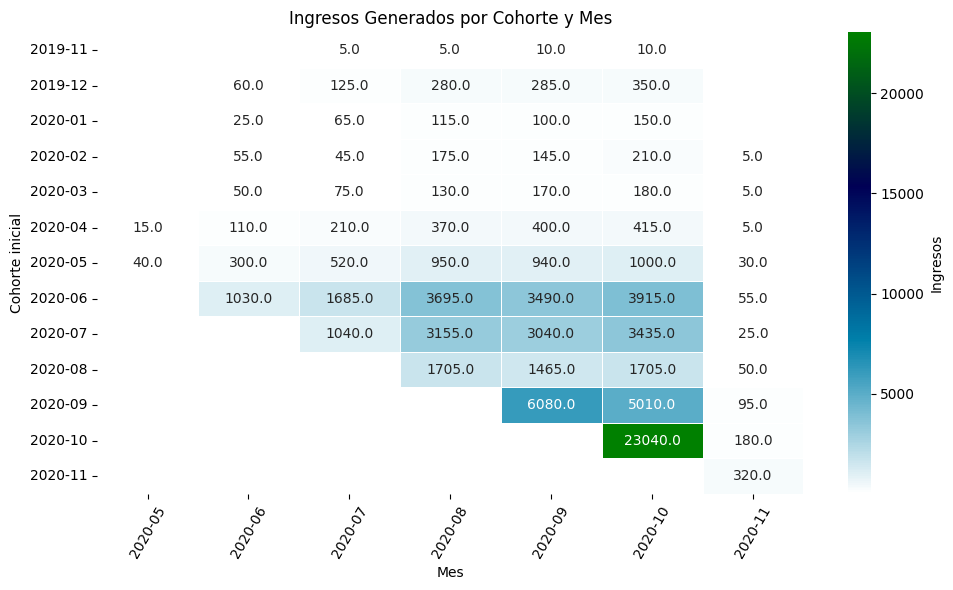

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_income,cmap= 'ocean_r', fmt=".1f", cbar_kws={'label': 'Ingresos'}, annot=True,linewidths=0.5)
plt.title('Ingresos Generados por Cohorte y Mes')
plt.xlabel('Mes')
plt.ylabel('Cohorte inicial')
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: xlabel='created_at_fees_by_YM', ylabel='cohorte_month'>

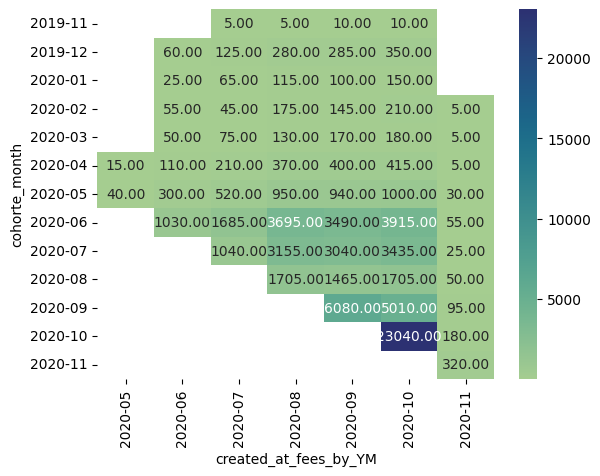

In [32]:
sns.heatmap(pivot_income,annot=True,fmt='.2f',cmap='crest')